#### Visualizaciones del dataset

Se analizará el dataset utilizando visualizaciones de las librerías `pandas`, `numpy`, `matplotlib` y `seaborn`

In [2]:
# Importar archivo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

df = pd.read_csv('../data/shopping_trends_updated.csv')


#### Segmentación por género de los clientes

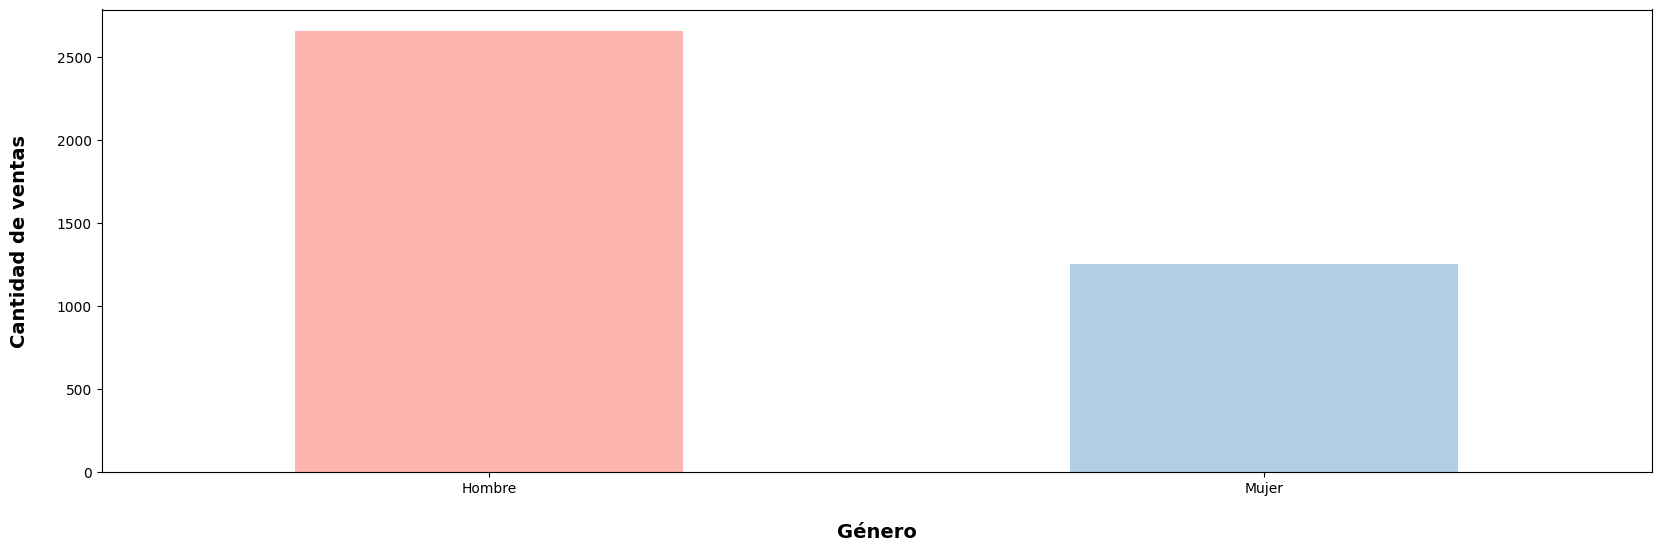

In [5]:
# Se define la paleta de colores
palette = plt.colormaps['Pastel1']    # Se utiliza la paleta Pastel de la documentación de matplotlib
colors = palette(range(len(df['Gender'].value_counts()))) # Se obtiene una lista de colores para cada categoría en la columna 'Gender'

# Se crea el gráfico de barras
plt.figure(figsize = (20, 6)) # Se configura el tamaño de la figura del gráfico
ax = df["Gender"].value_counts().plot(kind = 'bar', color=colors, rot = 0) # Se creaa un gráfico de barras con los colores definidos y sin rotación en las etiquetas del eje x
ax.set_xticklabels(('Hombre', 'Mujer')) # Se cambia las etiquetas del eje x a 'Hombre' y 'Mujer'

# Se configura las etiquetas de los ejes
plt.xlabel('Género', weight = "bold", color = "k", fontsize = 14, labelpad = 20)
plt.ylabel('Cantidad de ventas', weight = "bold", color = "k", fontsize = 14, labelpad = 20)
plt.show()

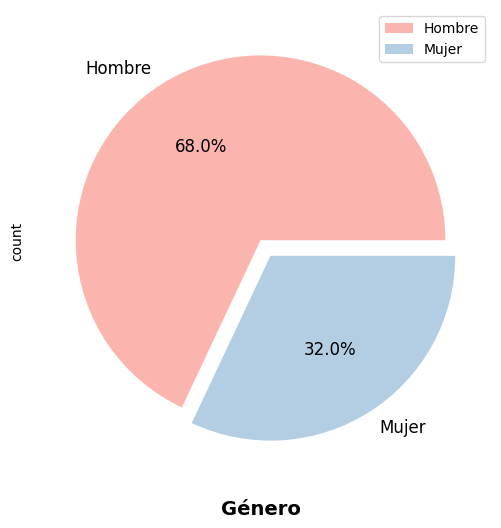

In [51]:
# Gráfico de torta

plt.figure(figsize = (20, 6)) # Se configura el tamaño

counts = df["Gender"].value_counts() # Se cuenta las cantidades de hombre y mujeres

# Se crea el gráfico de torta con etiquetas de % y con efecto de separacion entre los grupos 
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = (0,0.1), autopct = '%1.1f%%', labels=['Hombre', 'Mujer'])
plt.xlabel('Género', weight = "bold", color = "k", fontsize = 14, labelpad = 20) # Se configura la etiqueta del eje x
plt.legend(labels=['Hombre', 'Mujer'], loc='best') # Se configura la leyenda basada en el orden de 'counts.index'
plt.show()

Se observa que el 68% de los clientes son hombres.

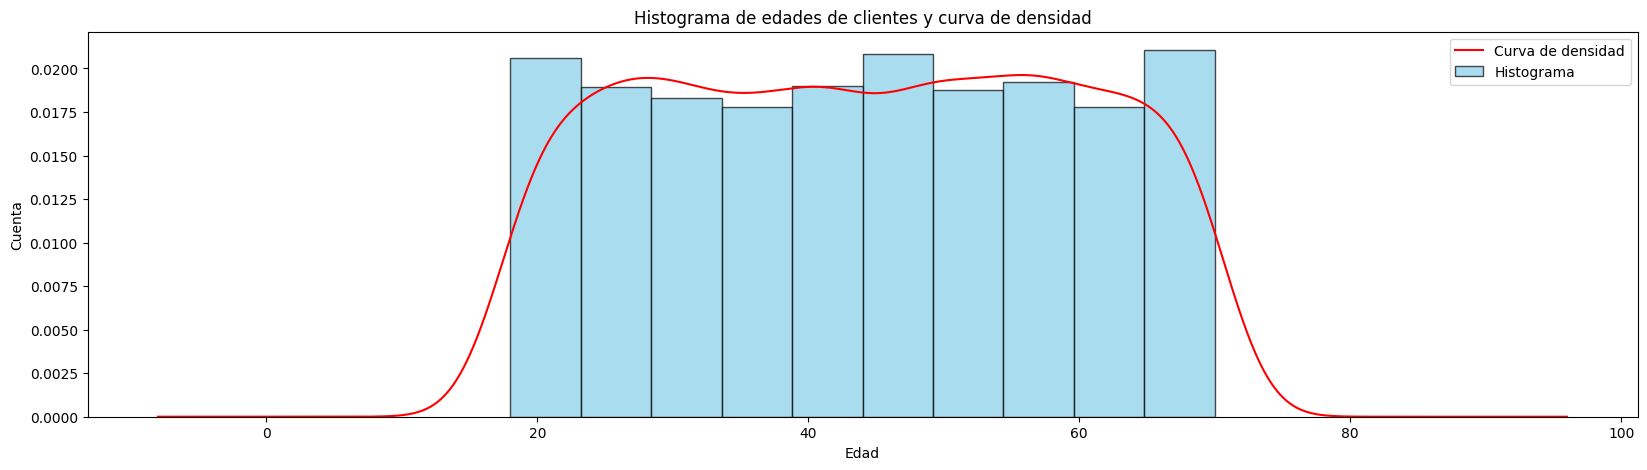

In [57]:
# Histograma de edades de clientes

fig, ax = plt.subplots(figsize = (20, 5)) # Se crea la figura y un eje para graficar

# Creación del histograma por edades 
ax.hist(df['Age'], bins = 10, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True) 
df['Age'].plot(kind = 'kde', color = 'red', ax = ax) # Se agrega la curva de densidad sobre el histograma

# Se configra las etiquetas, el título y la leyenda del gráfico
ax.set_xlabel('Edad')
ax.set_ylabel('Cuenta')
ax.set_title('Histograma de edades de clientes y curva de densidad')
ax.legend(['Curva de densidad', 'Histograma'])
plt.show()

Se observa en el histograma que las edades de los clientes van desde 18 a 70 años, sin que ningún grupo etáreo destaque por sobre otro (curva de densidad plana). 

#### Segmentación por categoría de productos  
- Se procede a analizar, mediante gráficos, las categorías de productos más vendidos

In [3]:
# Las categorias de productos son
print(df["Category"].value_counts())

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


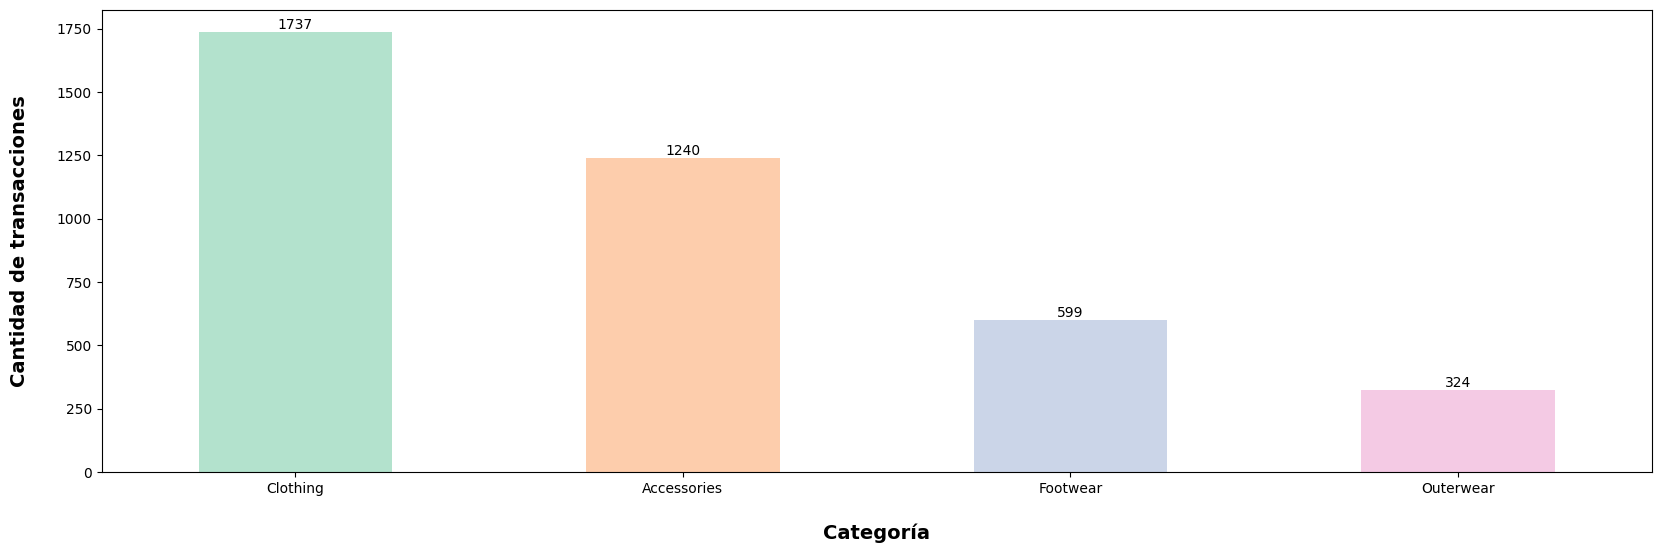

In [25]:
palette = plt.colormaps['Pastel2']    # Se utiliza la paleta Pastel2 de la documentación de matplotlib
colors = palette(range(len(df['Category'].value_counts()))) # Se obtiene una lista de colores para cada categoría en la columna 'Category'

# Se crea la figura y un eje para graficar
plt.figure(figsize = (20, 6))
ax = df["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches: # Para cada barra en el gráfico, se agrega una anotación con el valor de la altura de la barra
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    
# Se configra las etiquetas de los ejes
plt.xlabel('Categoría', weight = "bold", color = "k", fontsize = 14, labelpad = 20)
plt.ylabel('Cantidad de transacciones', weight = "bold", color = "k", fontsize = 14, labelpad = 20)
plt.show()

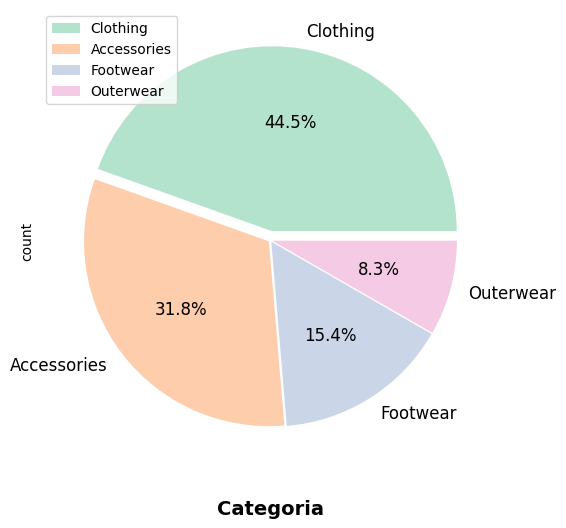

In [40]:
# Se crea la figura para graficar
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0.05, 0.01, 0.01, 0.01)

# Se crea el gráfico, con explode configurado para separar la categoría más vendida: 'Clothing'
counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Categoria', weight = "bold", color = "k", fontsize = 14, labelpad = 20) # Se añade etiqueta al eje x
plt.legend(labels = counts.index, loc = "best") # Se configura la leyenda
plt.show()

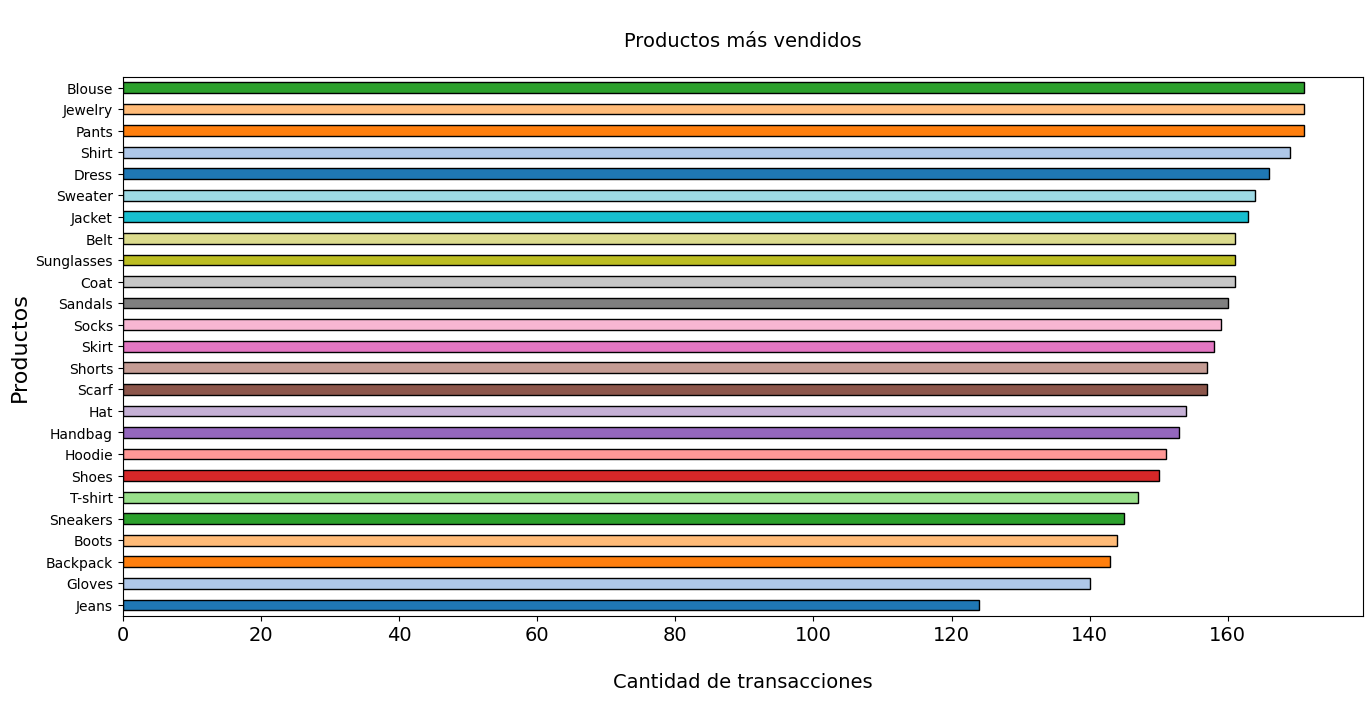

In [39]:
# Se crea la figura para un gráfico de barras
plt.figure(figsize = (16, 7))

# Se hace el recuento de productos 'Item Purchased' y se grafica utilizando una paleta de colores de seaborn
df["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'k')

# Se configuran las etiquetas de x y el titulo
plt.ylabel('Productos', fontsize = 16)
plt.xlabel('\nCantidad de transacciones', fontsize = 14)
plt.title('\nProductos más vendidos\n', fontsize = 14)
plt.show()

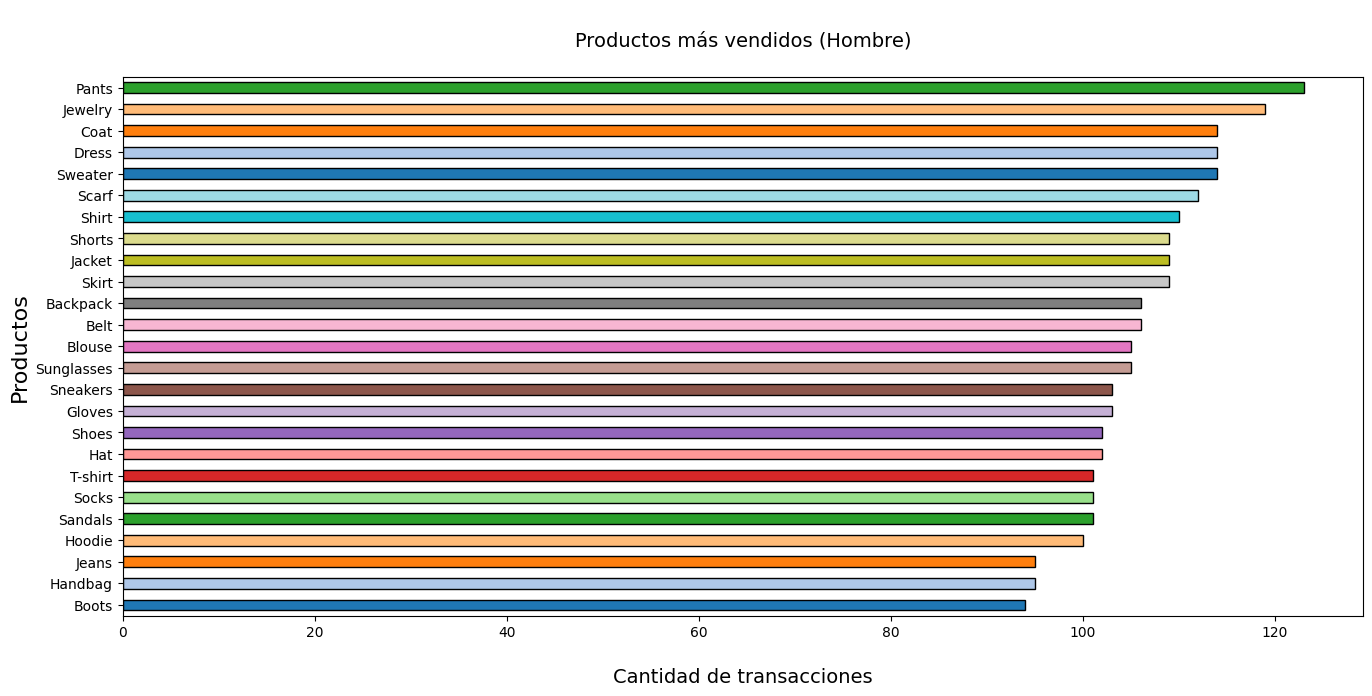

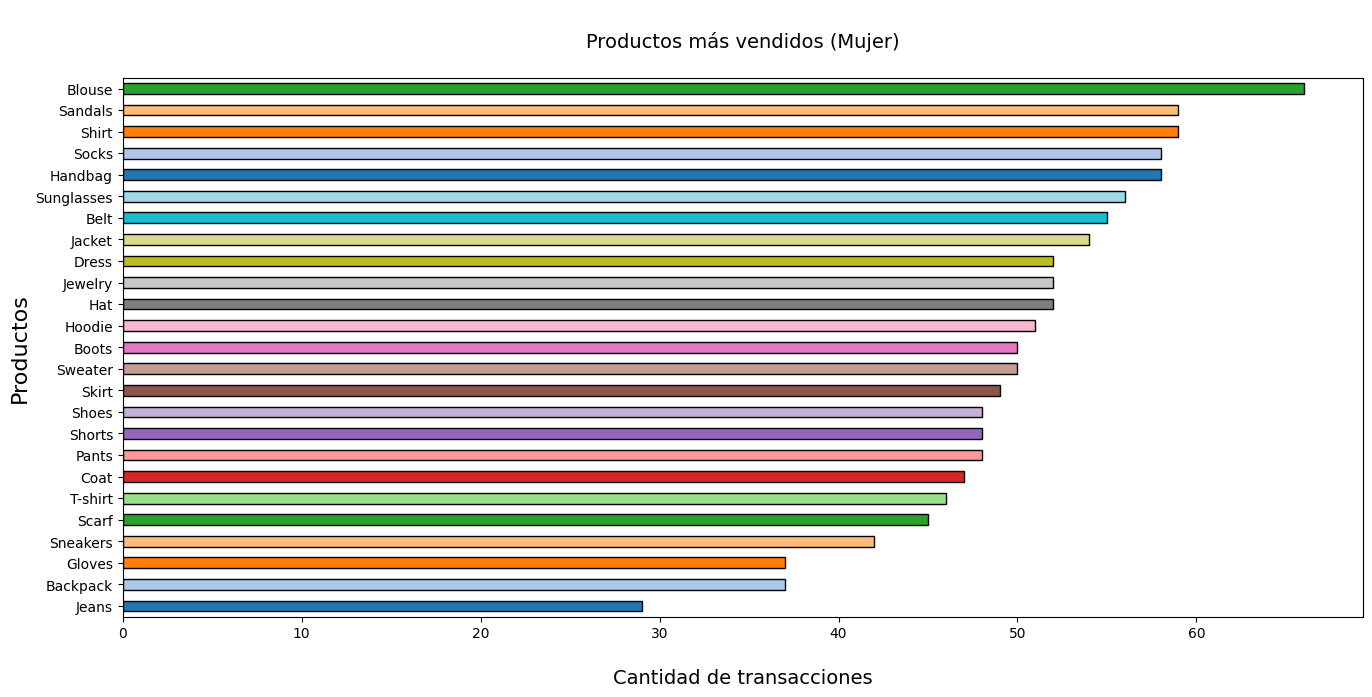

In [42]:
# Se filtra los datos por género masculino
df_male = df[df["Gender"] == "Male"]

# Se filtra los datos por género femenino
df_female = df[df["Gender"] == "Female"]

# Grafico para el género masculino
plt.figure(figsize = (16, 7))

# Se hace el recuento de productos 'Item Purchased' y se grafica utilizando una paleta de colores de seaborn
df_male["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'k')
plt.ylabel('Productos', fontsize = 16)
plt.xlabel('\nCantidad de transacciones', fontsize = 14)
plt.title('\nProductos más vendidos (Hombre)\n', fontsize = 14)
plt.show()

# Grafico para el género femenino
plt.figure(figsize = (16, 7))
df_female["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'k')
plt.ylabel('Productos', fontsize = 16)
plt.xlabel('\nCantidad de transacciones', fontsize = 14)
plt.title('\nProductos más vendidos (Mujer)\n', fontsize = 14)
plt.show()


Se observa que los hombres compran cerca del doble de productos que las mujeres, y los productos que más prefieren son Pantalones, Joyas, Abrigos y Vestidos. Mientras que las mujeres compran más Blusas, Sandalias, Poleras y Calcetines. 

Finalmente, se analizará la frecuencia de compras (Columna `Frequency of Purchases`) para buscar si hay algún patron de compra significativo.

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64


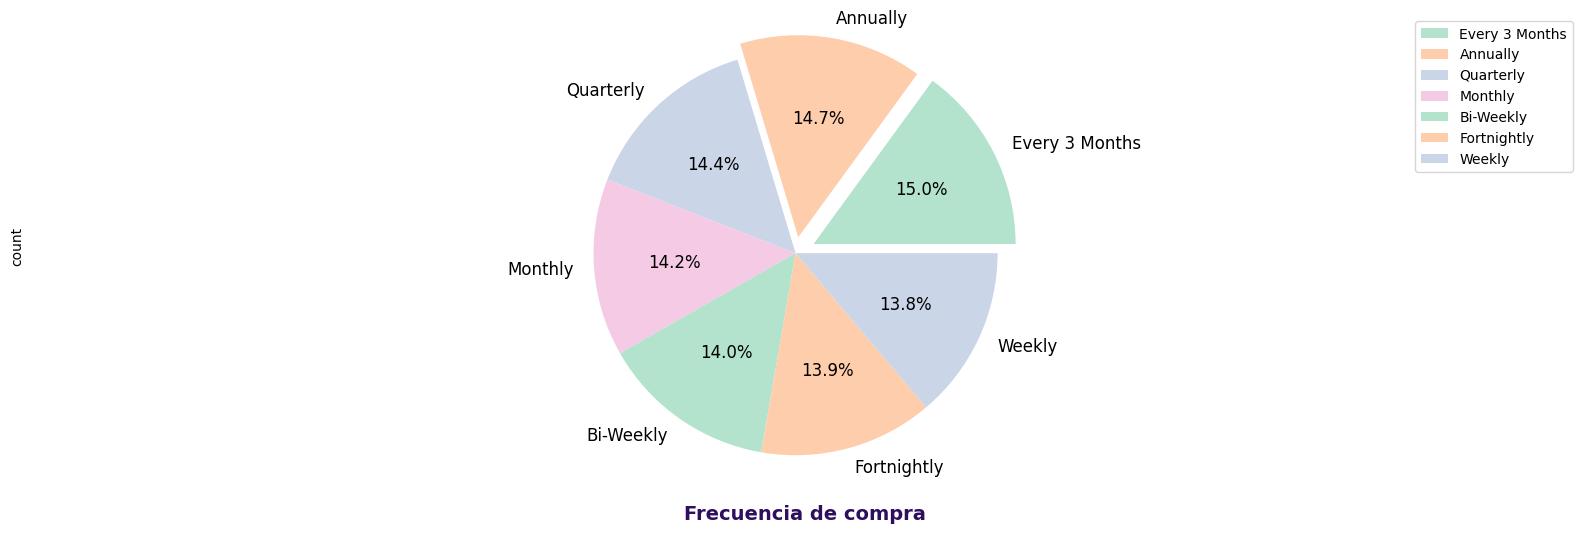

In [50]:
# Se crea la figura para graficar
plt.figure(figsize = (20, 6))
# Se hace el recuento de productos 'Item Purchased' y se muestra los resultados
cuenta_frecuencia = df["Frequency of Purchases"].value_counts()
print(cuenta_frecuencia)

# Se define explode para destacar la categoría más frecuente
explode = (0.1, 0.08, 0, 0, 0, 0, 0)

# Se grafica el gráfico de torta con sus ejes y leyenda y se centra en la pantalla
cuenta_frecuencia.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Frecuencia de compra', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = cuenta_frecuencia.index, loc = "best")
plt.show()

No hay mucha diferencia entre las cantidades de frecuencias de compra, siendo la menor, con 13,8%, Semanal, y la mayor frecuencia es Cada 3 meses, con 15%. Seguida muy de cerca por la frecuencia Anual (14,7%).

La aplicación práctica se concluirá en el notebook 04_aplicacion.ipynb